In [1]:
from functools import partial
import pickle as pkl
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

os.chdir("/home/peisenha/structExpectations/development/estimations/basecamp")

In [2]:
fname = "/home/peisenha/structExpectations/data-exchange-sciebo/df-observed-data-weighted-subsample.pkl"
df_obs = pd.read_pickle(fname)

In [3]:
model_params_start = pd.read_pickle("start.soepy.pkl")
model_params_start

value     upper    lower  \
category          name                                                     
benefits_base                              200.000000  1000.000  100.000   
const_wage_eq     gamma_0s1                  1.946973     3.700    1.380   
                  gamma_0s2                  2.122471     3.700    1.380   
                  gamma_0s3                  2.127348     3.700    1.380   
delta                                        0.980000     0.990    0.900   
exp_accm          g_s1                       0.096268     0.500    0.001   
                  g_s2                       0.199460     0.500    0.001   
                  g_s3                       0.301422     0.500    0.001   
exp_deprec        delta_s1                   0.020000     0.200    0.001   
                  delta_s2                   0.020000     0.200    0.001   
                  delta_s3                   0.020000     0.200    0.001   
exp_returns       gamma_1s1                  0.169869     0.500    0.001   
                  gamma_1s2                  0.188104     0.500    0.001   
                  gamma_1s3                  0.347085     0.500    0.001   
fval              fval                    2366.446813       NaN      NaN   
hetrg_unobs       theta_f1                  -0.998686    -0.100   -1.000   
                  theta_p1                  -0.655901    -0.100   -1.000   
mu                                          -0.560000    -0.990   -0.010   
sd_wage_shock     sigma_1                    0.351430     1.000    0.001   
                  sigma_2                    0.392801     1.000    0.001   
shares            share_1                    0.660619     0.900    0.100   
disutil_work      no_kids_f_educ_low         0.844228     2.000    0.001   
                  no_kids_f_educ_middle      0.547738     2.000    0.001   
                  no_kids_f_educ_high        0.358222     2.000    0.001   
                  yes_kids_f_educ_low        1.449773     2.000    0.001   
                  yes_kids_f_educ_middle     1.337311     2.000    0.001   
                  yes_kids_f_educ_high       1.898027     2.000    0.001   
                  child_02_f                 0.106986     0.200    0.001   
                  child_35_f                 0.009398     0.200    0.001   
                  child_6orolder_f           0.002989     0.200    0.001   
                  no_kids_p_educ_low        -0.577553    -0.001   -1.500   
                  no_kids_p_educ_middle     -0.485823    -0.001   -1.500   
                  no_kids_p_educ_high       -0.410381    -0.001   -1.500   
                  yes_kids_p_educ_low       -0.365316    -0.001   -1.500   
                  yes_kids_p_educ_middle    -0.426357    -0.001   -1.500   
                  yes_kids_p_educ_high      -0.771660    -0.001   -1.500   
                  child_02_p                -0.256770    -0.001   -1.500   
                  child_35_p                -0.361214    -0.001   -1.500   
                  child_6orolder_p          -0.447324    -0.001   -1.500   
exp_accm_expected g_bar_s1                   0.500000     0.900    0.100   
                  g_bar_s2                   0.500000     0.900    0.100   
                  g_bar_s3                   0.500000     0.900    0.100   

                                          fixed  
category          name                           
benefits_base                              True  
const_wage_eq     gamma_0s1               False  
                  gamma_0s2               False  
                  gamma_0s3               False  
delta                                      True  
exp_accm          g_s1                    False  
                  g_s2                    False  
                  g_s3                    False  
exp_deprec        delta_s1                 True  
                  delta_s2                 True  
                  delta_s3                 True  
exp_returns       gamma_1s1               False  
   

In [4]:
df_sim_start = soepy.simulate(model_params_start, "resources/model_spec_init.yml")
df_sim_start = df_alignment(df_sim_start)
df_sim_start.to_pickle("df-sim-start.pkl")

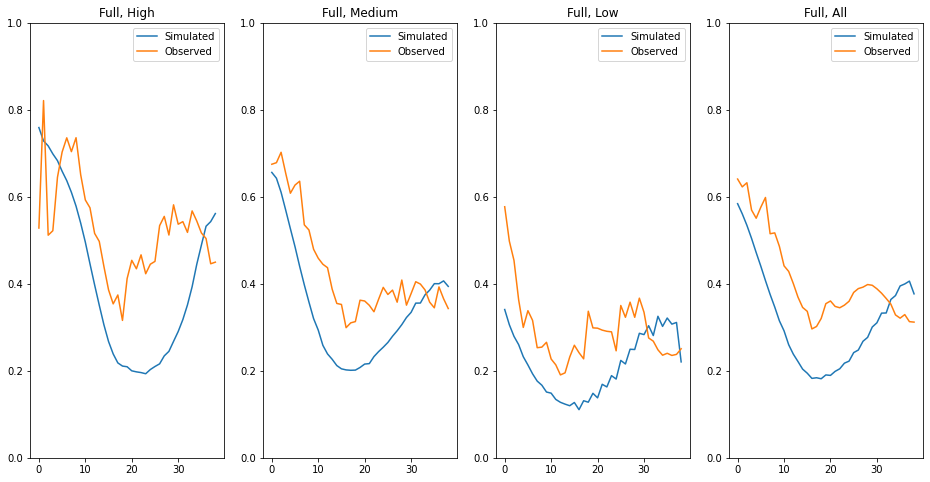

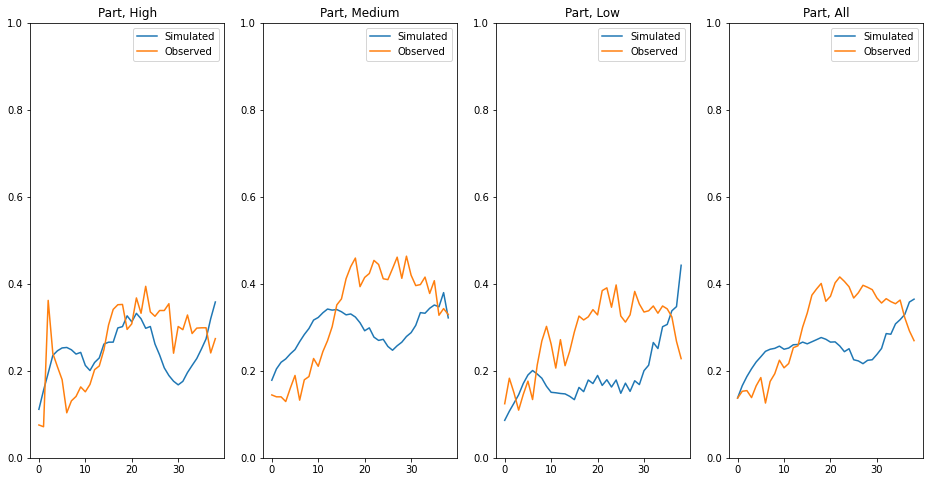

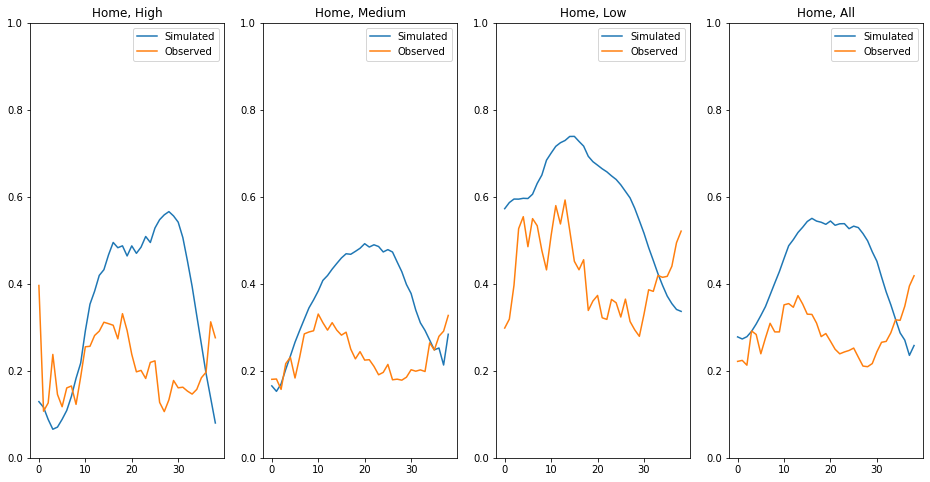

In [5]:
plot_basics_choices(df_sim=df_sim_start, df_obs=df_obs)

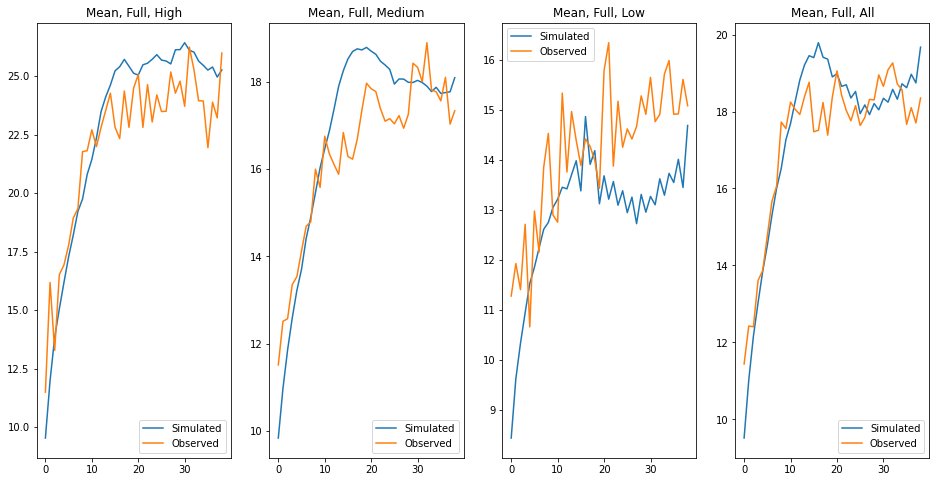

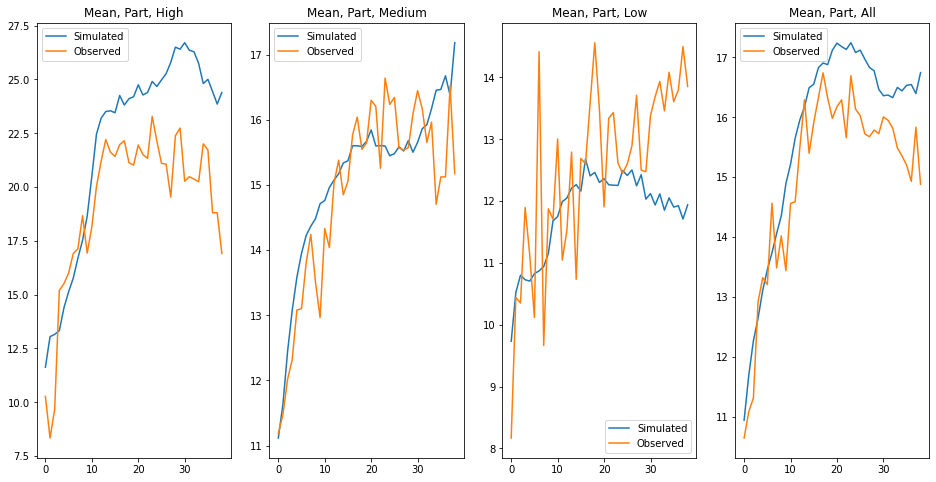

In [6]:
plot_basics_wages(df_sim=df_sim_start, df_obs=df_obs)